
## Assignment 1: Multivariate Statistics

The exercises on this sheet are graded by a maximum of 10 points. You will be asked to implement several functions.

* Team work is not allowed.
* Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not.
* Importing external libraries is not allowed unless explicitly stated
* For your submission just upload a single zip file with your name as follows: Assignment1_NameLastname.zip
* Please be sure you add all the required files to your submission.
* Your code should run without any errors
* Be mindful of the due date specified on Moodle, late submissions will only be considered under extreme circumstances. 


To solve the exercises please use only the dedicated cells. Function skeletons will always be provided in the following form:


In [1]:
def problem_example(x):
    '''description'''

    return result

### Exercise 1 -- Multivariate normal distribution  (4 Points)

We know from the Lecture 2, the probability density function for multivariate normal is:

$f(x) = \frac{1}{\sqrt{(2 \pi)^d \det \Sigma}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right) ,$ 
    
where $\mu$ is the mean, $\Sigma$ the covariance matrix, and $d$ is the dimension of the space where $x$ takes values.

#### 1.1 Implement function `multivariate_normal`

`multivariate_normal` computes the probability of a point $x$ from the mean vector and the covariance matrix. Visualize then the following two bivariate normal distributions: 

(i) $ \mu_1 =  
\begin{bmatrix}
1 \\
0
\end{bmatrix}, \Sigma_1 =  
\begin{bmatrix}
1 & 0 \\
0 & 2
\end{bmatrix} $

(ii) $ \mu_2 = 
\begin{bmatrix}
0 \\
-1
\end{bmatrix},
\Sigma_2 =  
\begin{bmatrix}
9 & -2.5 \\
-2.5 & 1 
\end{bmatrix} $

You cannot use already implemented functions for `multivariate_normal` from python libraries. Helpful modules/functions that you might need are `numpy.linalg` and `numpy.ndarray.T`

In [2]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

sys.path.append('dist')
from utils import *
from dist.test import (
    test_multivariate_normal,
    test_marginalize_multivariate_normal,
    test_univariate_normal,
    test_kl_divergence,
    test_emd
)

%matplotlib inline


mu_1 = np.array([1,0])
cov_1 = np.array([[1,0],[0,2]])

mu_2 = np.array([0,-1])
cov_2 = np.array([[9,-2.5],[-2.5,1]])

In [3]:
def multivariate_normal(x, mean, covariance):
    """pdf of the multivariate normal distribution."""
    d = len(mean)
    expo = -0.5 * (x-mean).T @ np.linalg.inv(covariance) @ (x-mean)
    nenner = ((2 * np.pi)**d * np.linalg.det(covariance))**(1/2)
    p = 1 / nenner * np.exp(expo)

    return p

In [4]:
# test your implementation (should say "Works correctly!", shows an error if not)
test_multivariate_normal(multivariate_normal)

Your solution seems to work correctly!


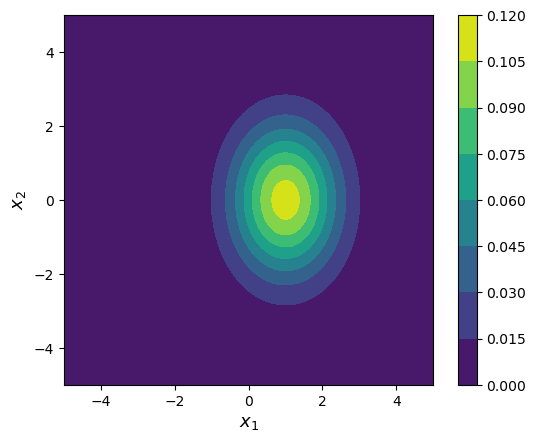

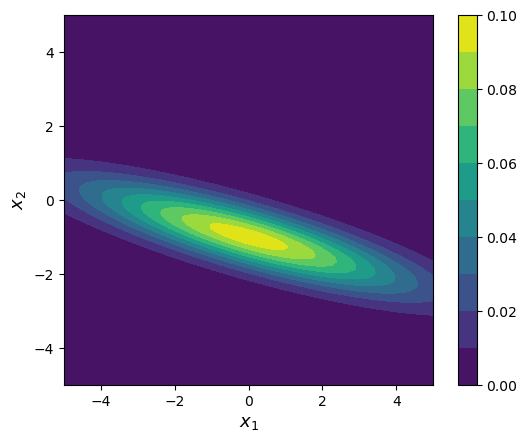

In [5]:
# visualize the two normal distribution
plot_2d_normal(mu_1,cov_1,multivariate_normal)
plot_2d_normal(mu_2,cov_2,multivariate_normal)

#### 1.2 Implement a function `marginalize_multivariate_normal`

This function receives as input the mean vector and the covariance matrix of a multivariate normal distribution, and the index of the dimension over which we want to compute the marginal distribution; it returns the mean and the variance of the univariate marginal distribution. Implement the function `univariate_normal` that computes the probability of a univariate normal distribution. Get the mean and variance for dimension 0 marginal of normal distribution $1$, and for dimension 1 marginal of normal distribution $2$ 

In [6]:
def marginalize_multivariate_normal(mean, cov, dim):
    """extract univariate normal distribution for dimension dim"""

    mean_univariate = mean[dim]
    var = cov[dim, dim]
    
    return mean_univariate, var

In [7]:
# test your implementation
test_marginalize_multivariate_normal(marginalize_multivariate_normal)

Your solution seems to work correctly!


In [8]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    expo2 = -((x - mean)**2)/(variance*2)
    nenner2 = (2*np.pi * variance)**(1/2)
    p = 1 / nenner2 * np.exp(expo2)

    return p

In [9]:
# test your implementation
test_univariate_normal(univariate_normal)

Your solution seems to work correctly!


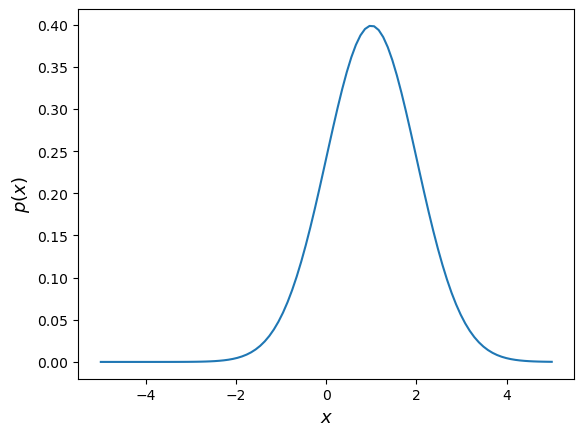

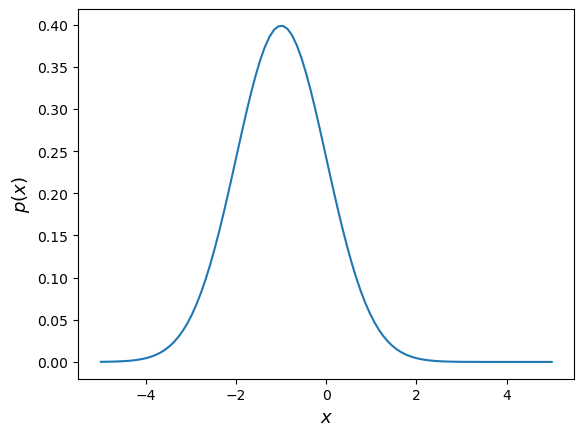

In [10]:
mu_1_marginal, var_1_marginal = marginalize_multivariate_normal(mu_1, cov_1, 0)
mu_2_marginal, var_2_marginal = marginalize_multivariate_normal(mu_2, cov_2, 1)

plot_1d_normal(mu_1_marginal, var_1_marginal, univariate_normal)
plot_1d_normal(mu_2_marginal, var_2_marginal, univariate_normal)

### 1.3 Visual interpretation

One way to view a gaussian distribution in 2D is using contour plot. In the following figure, we can see the contour plots of distributions with covariance and mean written below. Please complete the following cell and match the figures with correct values.

<img src="h.png">

Covariance matrices:

1. $ \Big( \begin{bmatrix}
1 & 0.8 \\
0.8 & 1 
\end{bmatrix}\Big) $
2. $ \Big( \begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}\Big) $
3. $ \Big( \begin{bmatrix}
1 & 0.8 \\
0.8 & 3 
\end{bmatrix}\Big) $
4. $ \Big( \begin{bmatrix}
1 & 0 \\
0 & 3.5 
\end{bmatrix}\Big) $
5. $ \Big( \begin{bmatrix}
3 & 0.8 \\
0.8 & 1 
\end{bmatrix}\Big) $
6. $ \Big( \begin{bmatrix}
1 & -1 \\
-1 & 3 
\end{bmatrix}\Big) $
7. $ \Big( \begin{bmatrix}
3 & -1 \\
-1 & 1 
\end{bmatrix}\Big) $
8. $ \Big( \begin{bmatrix}
1 & -1.5 \\
-1.5 & 3 
\end{bmatrix}\Big) $


Which image corresponds to which covariance matrix? In the following cell, assign an integer between 1 and 8 (inclusive) to the variables a - h to indicate your selection. Make sure to not use these variables anywhere else in the Notebook. Hint: Use the function implemented above to visualize the different multivariate distributions.

**Answer:**


In [11]:
a = 2

b = 4

c = 7

d = 6

e = 8

f = 1

g = 5

h = 3

### Exercise 2 --  EMD and KL Divergence (2 Points)


- Suppose we have two discrete distributions $P$ and $Q$ with the following probability mass functions:

In [12]:
P = np.array([4,2,1,5,8,2,3,1,2,2])/30.
Q = np.array([1,8,3,6,4,2,1,3,1,1])/30.

#### 2.1 write the functions `EMD` and `KL_div`

These functions receive as input two discrete distributions and compute the EMD and the KL divergence between the two (see course slides).

In [13]:
#KL Divergence implementation
def kl_divergence(P, Q):
    
    kl_div = 0
    for i in range(0, len(P)):
        summe = P[i] * np.log(P[i]/Q[i])
        kl_div += summe
    
    
    return kl_div 

In [14]:
# test your implementation
test_kl_divergence(kl_divergence)

/var/folders/17/l4jdd4c14lq_lx8ylbln6ck00000gn/T/ipykernel_2091/3556950015.py:6: RuntimeWarning: divide by zero encountered in log
  summe = P[i] * np.log(P[i]/Q[i])
/var/folders/17/l4jdd4c14lq_lx8ylbln6ck00000gn/T/ipykernel_2091/3556950015.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  summe = P[i] * np.log(P[i]/Q[i])


AssertionError: NaN value error

In [ ]:
#EMD implementation
def earth_mover_distance(P,Q):
    N = len(P)
    M = np.zeros(N)
    for i in range(N-1):
        M[i+1] = P[i] - Q[i] + M[i]
    emd_dis = np.sum(np.abs(M))
        
        
    return emd_dis

In [ ]:
# test your implementation
test_emd(earth_mover_distance)

Your solution seems to work correctly!


In [ ]:
print(earth_mover_distance(P,Q))

0.8000000000000002


In [ ]:
print(kl_divergence(P,Q))

0.37591197978858204


### Exercise 3 -- t-student test (4 points)

Assume you obtain three different samples coming from three normal distributions:

$P_a \sim X_a, P_b \sim X_b,P_c \sim X_c$.


We will perform a two-sample test to compare if the mean between pairs of samples is the same or not. This can be done with the $t$ statistic. We further more assume we have the same number of samples from each sample $N= N_a = N_b = N_c$:

$ t = \dfrac{\bar{x_a} - \bar{x_a}}
          {s\sqrt{\dfrac{2}{N}}} $

where the $s = \sqrt{\dfrac{(N-1)({s_a}^2 + {s_b}^2)}{2N-2}}$ and ${s_a}^2$ and ${s_b}^2$ are the sample variances.

Our goal is to use this test to see in which of the following cases we can identify wheter 2 samples have the same mean or not.


#### 3.1. write down the null-hypothesis that we assume to use the t-statistic (1 point)

**Options:**

a. H0 : $\mu_1$ =$\mu_2$    
b. H0 : 2 samples have the same mean

In [15]:
def answer_null_hypothesis():
    ans = 'a' # Write your answer for 3.1 here as 'a' or 'b'
    return ans

we will rely on the `np.random.normal` function to create a function that returns $N$ samples given a $\mu$ and $\sigma$. 

In [16]:
def get_samples(N, seed=0):
    
    np.random.seed(seed)
    X1 = np.random.normal(1,1,N)
    X2 = np.random.normal(1.25,1,N)
    X3 = np.random.normal(2.,1,N)
    
    return (X1,X2,X3)

In [17]:
Xa, Xb, Xc = get_samples(N=10)

#### 3.2 Complete the `compute_t_statistic` function:

In [27]:
def compute_t_statistic(x1,x2):
    
    n = x1.shape[0]
    assert x1.shape[0] == x2.shape[0]
    # compute sample mean and variances
    x1mean = np.mean(x1)
    x2mean = np.mean(x2)
   
    
    # first we compute the sample variances
    x1var = np.var(x1)
    x2var = np.var(x2)

    
    # compute the standard deviation of the differnce
    zahler = (n-1) * (x1var + x2var)
    nenner = 2 * n - 2 
    a = (zahler / nenner)**(1/2)
    
    t = (x1mean - x2mean) / (a * (2/n)**(1/2))
    
    return t
    

In [28]:
def t_test_means(X1,X2):
    
    t = compute_t_statistic(X1,X2)
    
    p = scipy.stats.t.sf(abs(t), 2*(X1.shape[0]-1))*2 # p-value --- yout might want to use scipy.stats.t, and remember to take into account both tails...
    
    return t, p


Now we can use `t_test_means` to compute the comparison between each pair: 

A vs B, A vs C, B vs C

In [29]:
t, p = t_test_means(Xb,Xa)
print(f't-statistic: {t:.3f}, p-value:{p:.2} ')

t-statistic: -0.234, p-value:0.82 


In [30]:
t, p = t_test_means(Xa,Xc)
print(f't-statistic: {t:.3f}, p-value:{p:.2} ')

t-statistic: -0.838, p-value:0.41 


In [31]:
t, p = t_test_means(Xb,Xc)
print(f't-statistic: {t:.3f}, p-value:{p:.2e} ')

t-statistic: -1.096, p-value:2.88e-01 


Using `scipy.stats.ttest_ind` you can check if your implementation is correct. Here we compare (Xa,Xa) but feel free to change the code to test if any of the other comparisons are correct (Xb,Xa) (Xa,Xc) (Xb,Xc)

In [32]:
t, p = scipy.stats.ttest_ind(Xa,Xa)
print(f't-statistic: {t:.3f}, p-value:{p:.2e} ')

t-statistic: 0.000, p-value:1.00e+00 


#### 3.3 Different sample sizes

Now test different sample sizes using the following code.

In [33]:
n_list = [1e1,5e1,1e2,5e2,1e3,5e3,1e4,5e4,1e5,5e5,1e6]
results = np.ones((3,len(n_list)))

for id_, n in enumerate(n_list):
    n = int(n)
    Xa, Xb, Xc = get_samples(N=n)
    
    _, p = t_test_means(Xa,Xb)
    results[0,id_] = p
    
    _, p = t_test_means(Xa,Xc)
    results[1,id_] = p
    _, p = t_test_means(Xc,Xb)
    results[2,id_] = p


Text(0, 0.5, 'p-value')

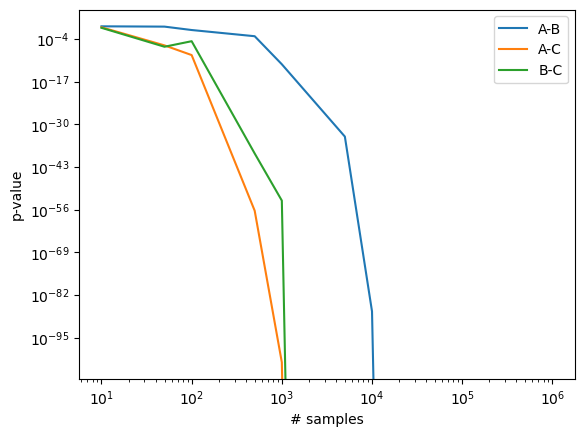

In [34]:
fig, ax = plt.subplots()
#log_p_values = np.log(results+1e-12)
log_p_values = results
ax.plot(n_list,log_p_values[0], label='A-B')
ax.plot(n_list,log_p_values[1], label='A-C')
ax.plot(n_list,log_p_values[2], label='B-C')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_xlabel("# samples")
ax.set_ylabel("p-value")

3.3(a) Which pair is the easiest to distinguish?    
3.3(b) Which pair is the hardest to distinguish?    

Optional: - How many samples do we need for the test to distinguish between the different pairs?    
*hint*: use the plot to support your analysis

In [35]:
def answer_exercise_3_3():
    
    ans1 = 'A-B' # Write your answer for 3.3(a) here as 'A-B', 'A-C', 'B-C'
    ans2 =  'A-C'# Write your answer for 3.3(b) here as 'A-B', 'A-C', 'B-C'
    
    return ans1, ans2

Man braucht mindestens $10^2$ Stichproben. Wenn man weniger hat, ist der p-Wert etwa gleich und somit schwierig zu diffrenzieren, wie man im Plot sieht.